# Bengali Fake News Classification
```
    আমি বাংলায় গান গাই
    আমি বাংলার গান গাই।
    আমি আমার আমিকে চিরদিন
    এই বাংলায় খুঁজে পাই।
    
```

In [55]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
import warnings
warnings.filterwarnings('ignore')

In [57]:
import pandas as pd
auth = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Authentic-48K.csv")
fake = pd.read_csv("/content/drive/MyDrive/Fake-1K.csv")



In [58]:
df1=auth
df2=fake
df_merged = df1.merge(df2)


In [59]:
auth.head()

,articleID,domain,date,category,headline,content,label
0,1,jagonews24.com,2018-09-19 17:48:18,Education,"হট্টগোল করায় বাকৃবিতে দুইজন বরখাস্ত, ৬ জনকে শোকজ",গত ১৭ সেপ্টেম্বর বাংলাদেশ কৃষি বিশ্ববিদ্যালয়ে ...,1
1,2,jagonews24.com,2018-09-19 17:48:19,National,মালয়েশিয়ায় কর্মী পাঠানোর ব্যবস্থা নেয়ার সুপারিশ,বাংলাদেশের বৃহৎ শ্রমবাজার মালয়েশিয়ায় আবার শ্রম...,1
2,3,jagonews24.com,2018-09-19 17:48:20,National,প্রেমের প্রস্তাবে রাজি না হওয়ায় স্কুলছাত্রীকে ...,নরসিংদীর মনোহরদীতে প্রেমের প্রস্তাবে রাজি না হ...,1
3,4,jagonews24.com,2018-09-19 17:48:21,Crime,মেডিয়েশনই মামলাজট নিরসনের পথ : বিচারপতি আহমেদ ...,সুপ্রিম কোর্টের হাইকোর্ট বিভাগের বিচারপতি আহমে...,1
4,5,jagonews24.com,2018-09-19 17:48:21,National,টকশোতে বক্তব্য দিতে গিয়ে জাপা নেতার মৃত্যু,মাদারীপুর সদরের উপজেলার লেকেরপাড়ে একটি বেসরকার...,1


,articleID,domain,date,category,headline,content,label
0,1,jagonews24.com,2018-09-19 17:48:18,Education,"হট্টগোল করায় বাকৃবিতে দুইজন বরখাস্ত, ৬ জনকে শোকজ",গত ১৭ সেপ্টেম্বর বাংলাদেশ কৃষি বিশ্ববিদ্যালয়ে ...,1
1,2,jagonews24.com,2018-09-19 17:48:19,National,মালয়েশিয়ায় কর্মী পাঠানোর ব্যবস্থা নেয়ার সুপারিশ,বাংলাদেশের বৃহৎ শ্রমবাজার মালয়েশিয়ায় আবার শ্রম...,1
2,3,jagonews24.com,2018-09-19 17:48:20,National,প্রেমের প্রস্তাবে রাজি না হওয়ায় স্কুলছাত্রীকে ...,নরসিংদীর মনোহরদীতে প্রেমের প্রস্তাবে রাজি না হ...,1
3,4,jagonews24.com,2018-09-19 17:48:21,Crime,মেডিয়েশনই মামলাজট নিরসনের পথ : বিচারপতি আহমেদ ...,সুপ্রিম কোর্টের হাইকোর্ট বিভাগের বিচারপতি আহমে...,1
4,5,jagonews24.com,2018-09-19 17:48:21,National,টকশোতে বক্তব্য দিতে গিয়ে জাপা নেতার মৃত্যু,মাদারীপুর সদরের উপজেলার লেকেরপাড়ে একটি বেসরকার...,1


In [60]:
fake.head()

,articleID,domain,date,category,headline,content,label
0,1,channeldhaka.news,2019-03-14T13:34:14+00:00,International,মুরগির হামলায় শেয়াল নিহত,"বাংলায় একটা প্রবাদ আছে, শেয়ালের কাছে মুরগী বর্...",0
1,2,earki.com,"সেম্বর ১৭, ২০১৮",Miscellaneous,বিটিভিতে যেবার আমি ইন্টারভিউ দিতে গেলাম,"BTV থেকে লোকজন আসছে, ইন্টারভিউ নিবে।চারজনের টি...",0
2,3,earki.com,"২০:৩৯, জানুয়ারি ১৪, ২০১৯",Miscellaneous,বিদেশ থেকে উন্নতমানের বিরোধীদল আমদানি করার পরা...,অদ্ভুত বিরোধীদলহীনতায় ভুগছে সরকার। এ এক অন্যরক...,0
3,4,channeldhaka.news,2018-06-30T15:56:47+00:00,Sports,অবসর নেয়ার ঘোষণা দিলেন মেসি !,রাশিয়া বিশ্বকাপ নকআউট পর্বে ফ্রান্সের সাথে ৪-৩...,0
4,5,motikontho.wordpress.com,2013-03-05T21:55:45+00:00,Miscellaneous,"মাদারফাকার নহে, ব্রাদারফাকার: সাকা | দৈনিক মতি...","নিজস্ব মতিবেদক‘মাদারফাকার নহে, আমি ব্রাদারফাকা...",0


,articleID,domain,date,category,headline,content,label
0,1,channeldhaka.news,2019-03-14T13:34:14+00:00,International,মুরগির হামলায় শেয়াল নিহত,"বাংলায় একটা প্রবাদ আছে, শেয়ালের কাছে মুরগী বর্...",0
1,2,earki.com,"সেম্বর ১৭, ২০১৮",Miscellaneous,বিটিভিতে যেবার আমি ইন্টারভিউ দিতে গেলাম,"BTV থেকে লোকজন আসছে, ইন্টারভিউ নিবে।চারজনের টি...",0
2,3,earki.com,"২০:৩৯, জানুয়ারি ১৪, ২০১৯",Miscellaneous,বিদেশ থেকে উন্নতমানের বিরোধীদল আমদানি করার পরা...,অদ্ভুত বিরোধীদলহীনতায় ভুগছে সরকার। এ এক অন্যরক...,0
3,4,channeldhaka.news,2018-06-30T15:56:47+00:00,Sports,অবসর নেয়ার ঘোষণা দিলেন মেসি !,রাশিয়া বিশ্বকাপ নকআউট পর্বে ফ্রান্সের সাথে ৪-৩...,0
4,5,motikontho.wordpress.com,2013-03-05T21:55:45+00:00,Miscellaneous,"মাদারফাকার নহে, ব্রাদারফাকার: সাকা | দৈনিক মতি...","নিজস্ব মতিবেদক‘মাদারফাকার নহে, আমি ব্রাদারফাকা...",0


# EDA

In [61]:
import matplotlib.pyplot as plt

def show_bar(column, title, top=100):
  plt.figure(figsize=(20,5))
  column[:top].plot(kind='bar')
  plt.title(title)
  plt.xlabel("ID")
  plt.ylabel("Count")
  plt.show()


import seaborn as sns

def show_dist(column):
  plt.figure(figsize=(10,5))
  sns.distplot(column)
  plt.show()

### Compare Headline Length and Content Length

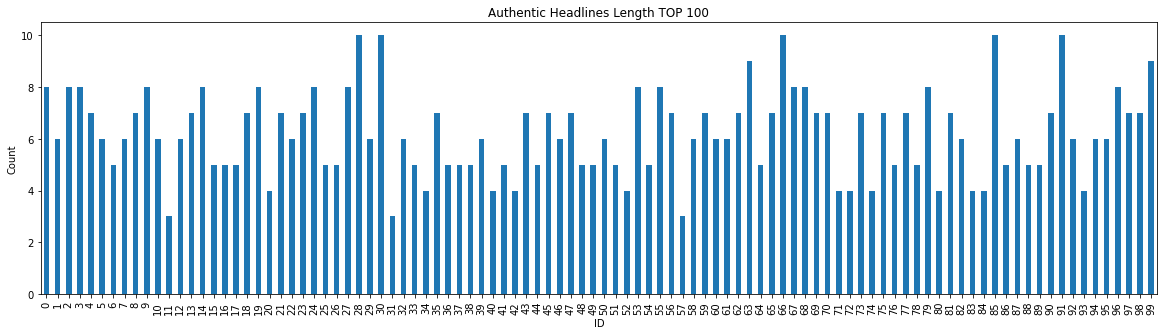

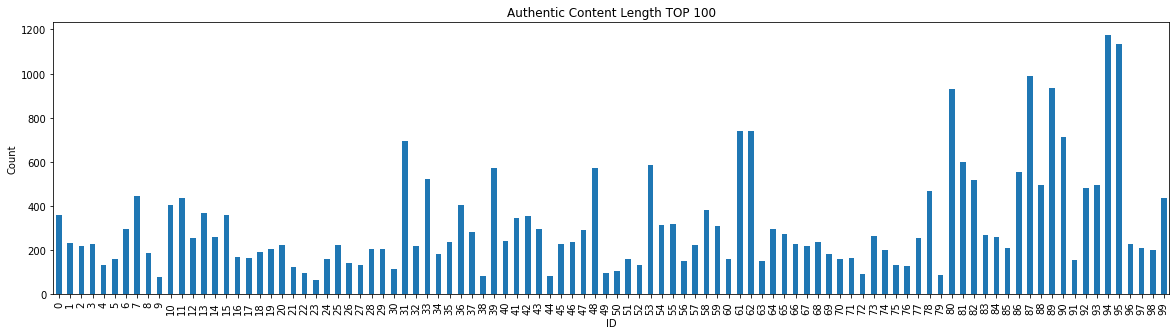

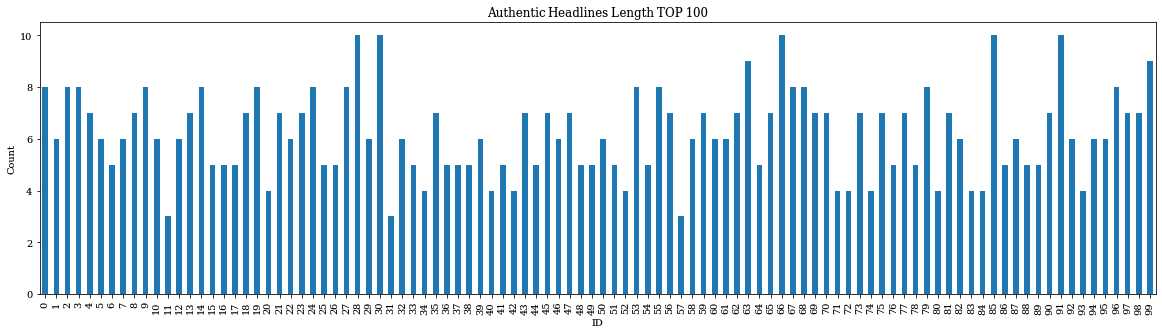

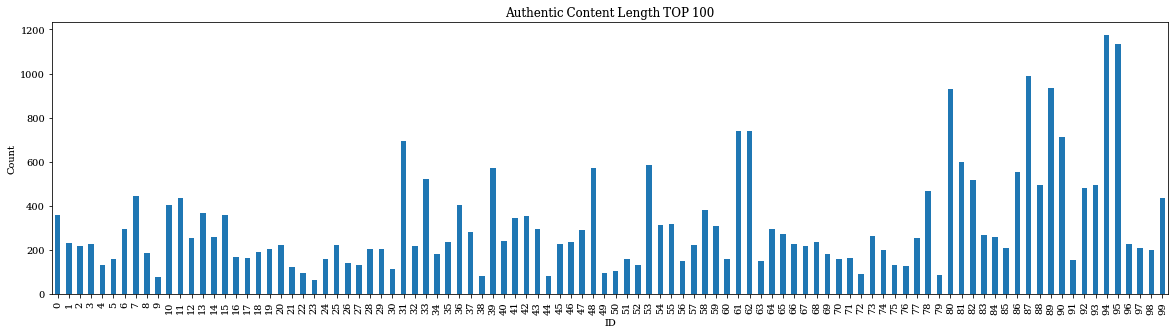

In [62]:
auth['head_lenght'] = auth.headline.apply(lambda x : len(x.split()))
auth['content_head_lenght'] = auth.content.apply(lambda x : len(x.split()))


show_bar(auth.head_lenght, "Authentic Headlines Length TOP 100")
print("")
show_bar(auth.content_head_lenght, "Authentic Content Length TOP 100")

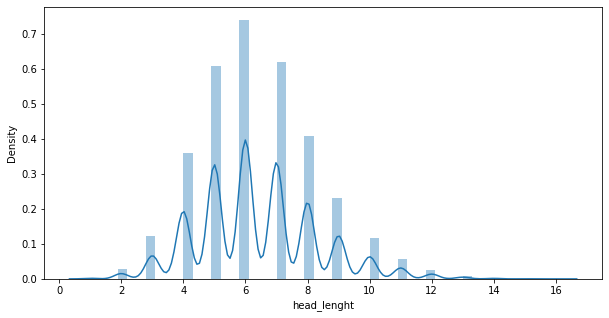

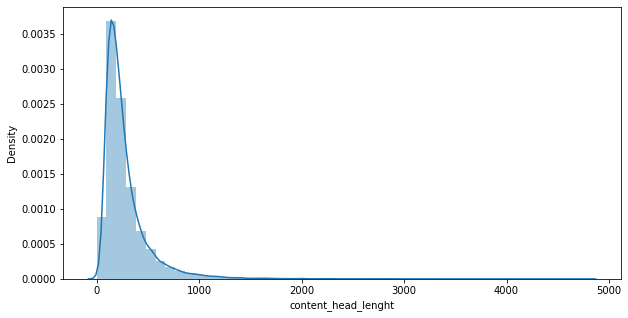

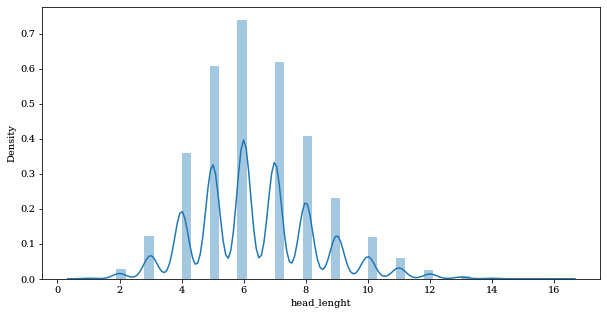

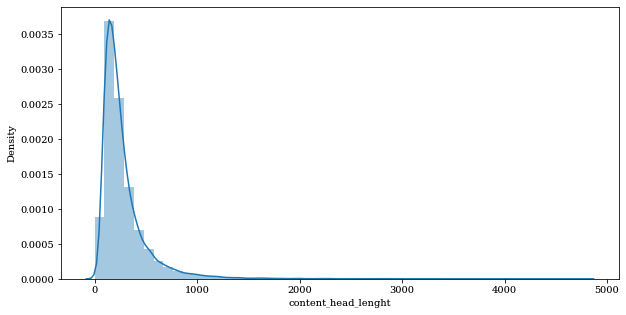

In [63]:
show_dist(auth.head_lenght)
print("")
show_dist(auth.content_head_lenght)

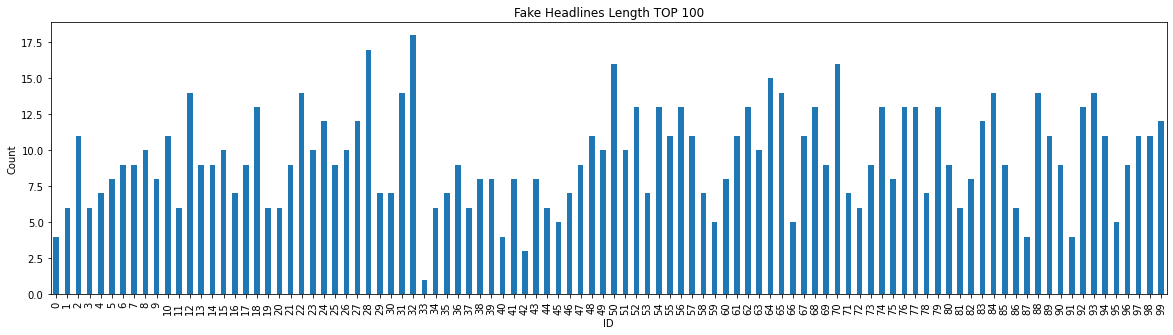

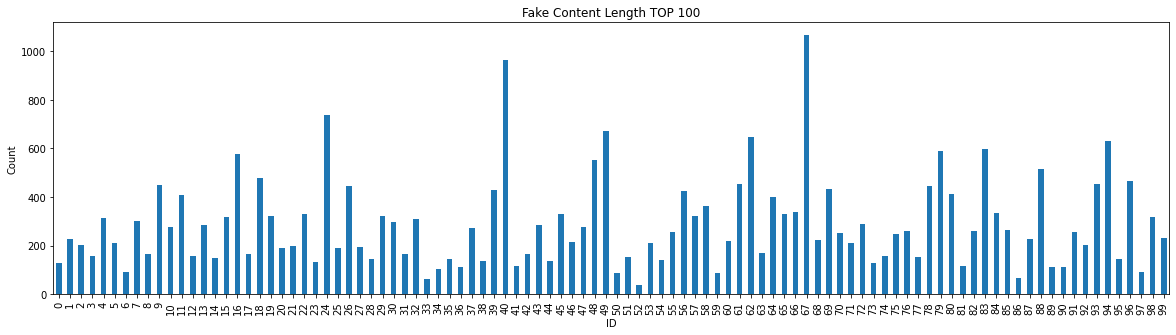

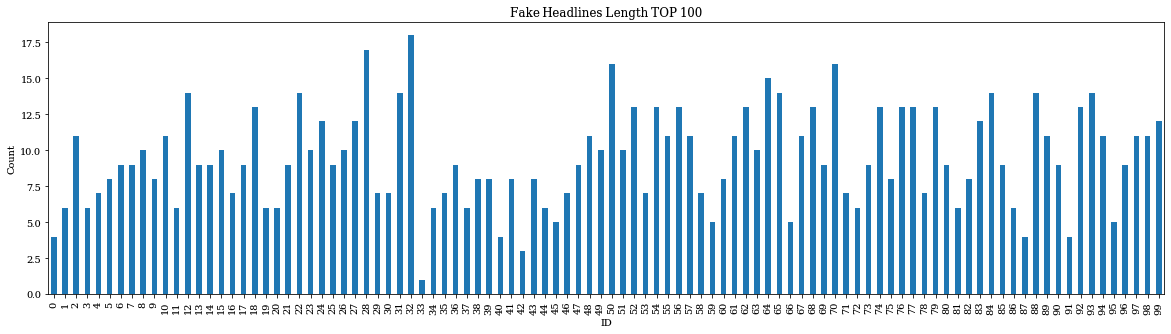

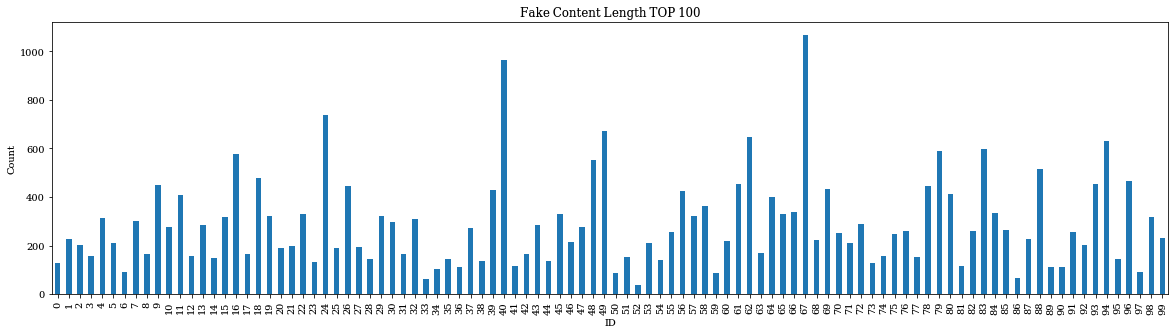

In [64]:
fake['head_lenght'] = fake.headline.apply(lambda x : len(x.split()))
fake['content_head_lenght'] = fake.content.apply(lambda x : len(x.split()))

show_bar(fake.head_lenght, "Fake Headlines Length TOP 100")
print("")
show_bar(fake.content_head_lenght, "Fake Content Length TOP 100")

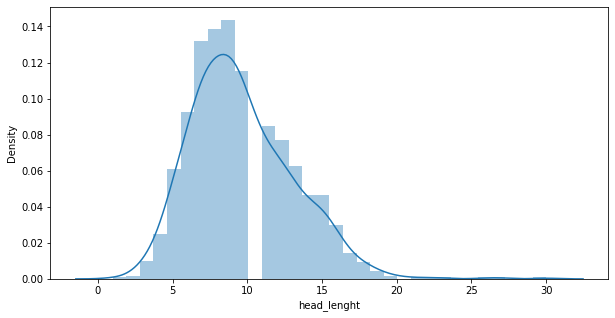

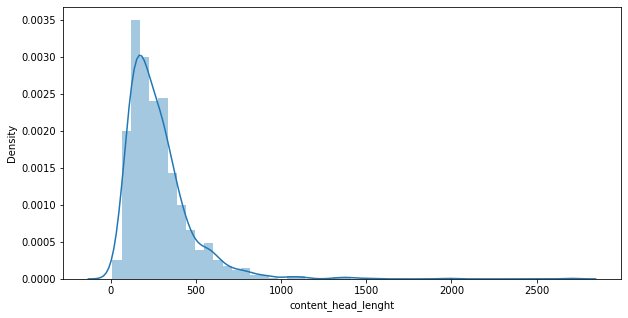

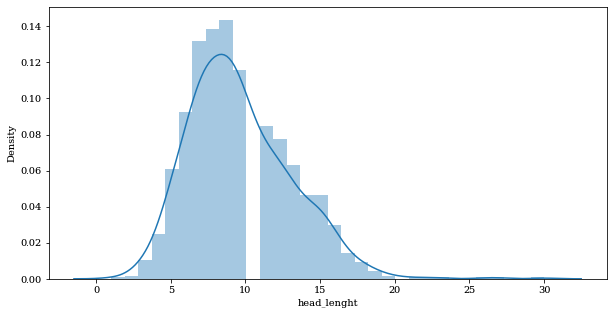

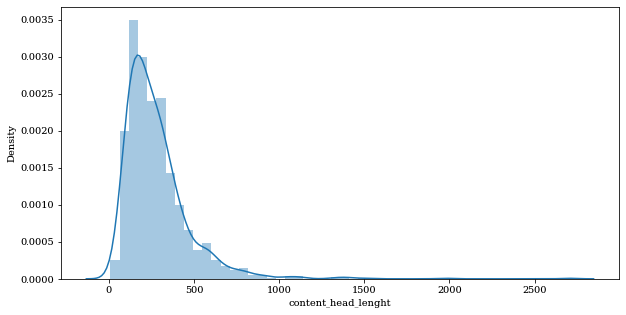

In [65]:
show_dist(fake.head_lenght)
print("")
show_dist(fake.content_head_lenght)

## Word Cloud

In [66]:
!wget https://www.easynepalityping.com/resource/font/bangla/06-nikosh-bangla-font.zip

--2023-01-05 04:25:22--  https://www.easynepalityping.com/resource/font/bangla/06-nikosh-bangla-font.zip
Resolving www.easynepalityping.com (www.easynepalityping.com)... 188.114.97.0, 188.114.96.0, 2a06:98c1:3121::, ...
Connecting to www.easynepalityping.com (www.easynepalityping.com)|188.114.97.0|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 317905 (310K) [application/zip]
Saving to: ‘06-nikosh-bangla-font.zip’

06-nikosh-bangla-fo 100%[===================>] 310.45K  --.-KB/s    in 0.01s   

2023-01-05 04:25:22 (24.3 MB/s) - ‘06-nikosh-bangla-font.zip’ saved [317905/317905]

--2023-01-05 05:12:14--  https://www.easynepalityping.com/resource/font/bangla/06-nikosh-bangla-font.zip
Resolving www.easynepalityping.com (www.easynepalityping.com)... 188.114.97.0, 188.114.96.0, 2a06:98c1:3121::, ...
Connecting to www.easynepalityping.com (www.easynepalityping.com)|188.114.97.0|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 317905 (310K) [a

In [67]:
!unzip 06-nikosh-bangla-font.zip

Archive:  06-nikosh-bangla-font.zip
  inflating: Nikosh.ttf              
Archive:  06-nikosh-bangla-font.zip
replace Nikosh.ttf? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [68]:
from wordcloud import WordCloud, STOPWORDS

def plot_world(text):

    wordcloud = WordCloud(width = 500, height = 500, 
                    background_color ='black', 
                    font_path="Nikosh.ttf",
                    min_font_size = 10).generate(text) 

    # plot the WordCloud image                        
    plt.figure(figsize = (5, 5), facecolor = 'k', edgecolor = 'k' ) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show() 

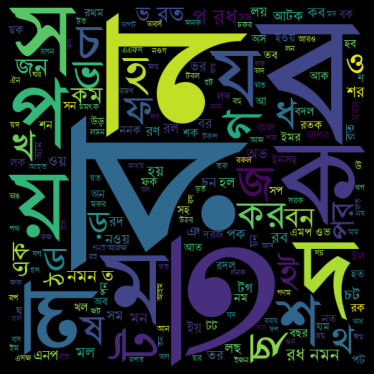

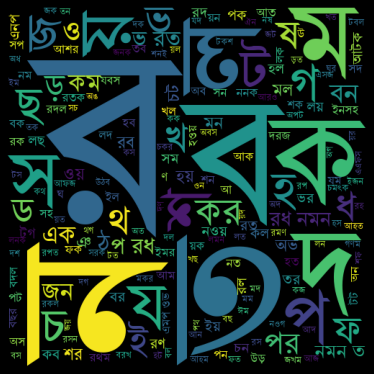

In [69]:
s= " ".join(auth.headline[:100])
plot_world(s)

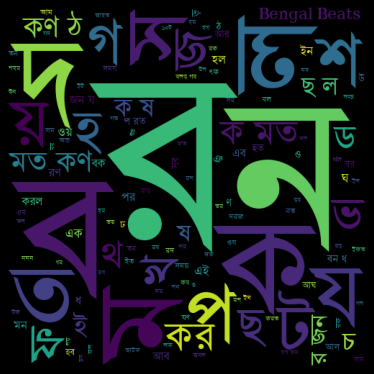

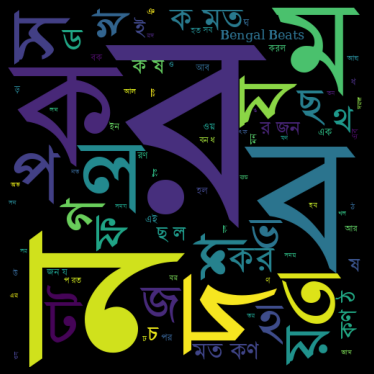

In [70]:
s= " ".join(fake.headline[:100])
plot_world(s)

# Analysis Words

In [71]:
!pip install bnlp_toolkit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.9/23.9 MB 65.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 73.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 69.6 MB/s eta 0:00:00
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [72]:
from bnlp import BasicTokenizer
tokenizer = BasicTokenizer()

s = """আমি বাংলায় গান গাই
    আমি বাংলার গান গাই।
    আমি আমার আমিকে চিরদিন
    এই বাংলায় খুঁজে পাই।"""

print(tokenizer.tokenize(s))

punkt not found. downloading...


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['আমি', 'বাংলায়', 'গান', 'গাই', 'আমি', 'বাংলার', 'গান', 'গাই', '।', 'আমি', 'আমার', 'আমিকে', 'চিরদিন', 'এই', 'বাংলায়', 'খুঁজে', 'পাই', '।']
['আমি', 'বাংলায়', 'গান', 'গাই', 'আমি', 'বাংলার', 'গান', 'গাই', '।', 'আমি', 'আমার', 'আমিকে', 'চিরদিন', 'এই', 'বাংলায়', 'খুঁজে', 'পাই', '।']


In [73]:
def create_corpus(texts):
    corpus=[]

    for txt in texts:
      tokens = tokenizer.tokenize(txt)
      corpus.extend(tokens)

    return corpus

In [74]:
auth_corpus = create_corpus(auth.headline[:1000])
print("Total auth tokens in 1000", len(auth_corpus))

fake_corpus = create_corpus(fake.headline[:1000])
print("Total auth tokens in 1000", len(fake_corpus))

Total auth tokens in 1000 7482
Total auth tokens in 1000 10525
Total auth tokens in 1000 7482
Total auth tokens in 1000 10525


In [75]:
from matplotlib import font_manager
# set font
font_manager.fontManager.addfont("Nikosh.ttf")
plt.rcParams['font.family'] = 'Nikosh'
plt.rcParams['font.sans-serif']=['Nikosh']
plt.rcParams['axes.unicode_minus']=False

In [76]:
from collections import defaultdict
from collections import  Counter
from bnlp.corpus import stopwords
import matplotlib.font_manager as fm

def show_stop_words(corpus, length=20):
  dic = defaultdict(int)

  for word in corpus:
      if word in stopwords:
          dic[word]+=1

  top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:length]
  x,y=zip(*top)
  print(x)
  print(y)
  plt.figure(figsize=(10,5))
  plt.bar(x,y)
  plt.show()

('না', 'ও', 'শুরু', 'হবে', 'করে', 'নিয়ে', 'জন্য', 'থেকে', 'দুই', 'নতুন', 'সঙ্গে', 'কোটি', 'করা', 'করতে', 'হচ্ছে', 'দিতে', 'পর', 'প্রথম', 'কাজ', 'হাজার')
(57, 34, 23, 23, 23, 22, 21, 21, 19, 17, 17, 16, 16, 14, 14, 11, 11, 11, 11, 11)


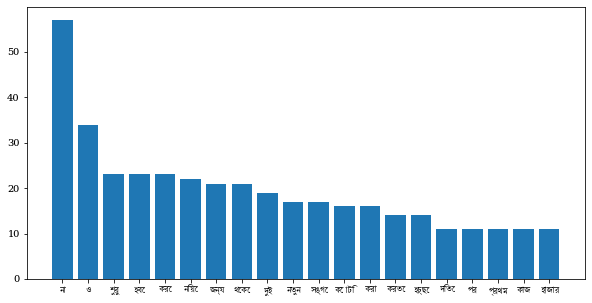

('না', 'ও', 'শুরু', 'হবে', 'করে', 'নিয়ে', 'জন্য', 'থেকে', 'দুই', 'নতুন', 'সঙ্গে', 'কোটি', 'করা', 'করতে', 'হচ্ছে', 'দিতে', 'পর', 'প্রথম', 'কাজ', 'হাজার')
(57, 34, 23, 23, 23, 22, 21, 21, 19, 17, 17, 16, 16, 14, 14, 11, 11, 11, 11, 11)


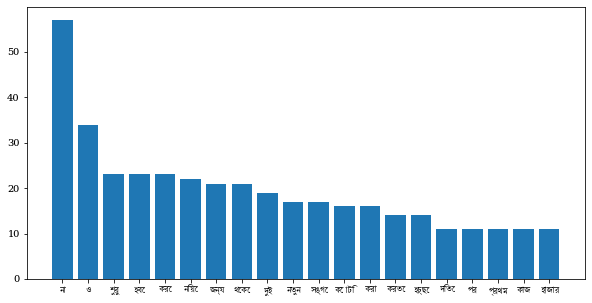

In [77]:
show_stop_words(auth_corpus)

('না', 'যে', 'করে', 'ও', 'থেকে', 'নিয়ে', 'এই', 'জন্য', 'দিলেন', 'করলেন', 'এবার', 'করতে', 'কি', 'করা', 'বেশি', 'হবে', 'দুই', 'যা', 'পর', 'আমার')
(101, 58, 53, 40, 36, 36, 36, 28, 26, 25, 25, 25, 25, 22, 20, 20, 20, 18, 17, 17)


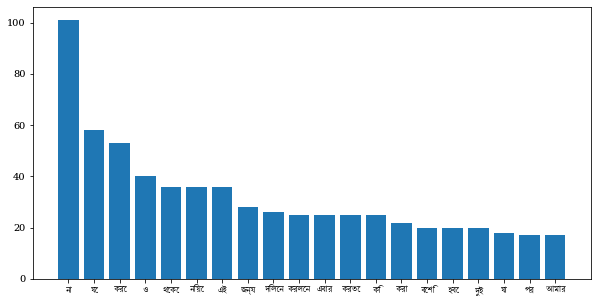

('না', 'যে', 'করে', 'ও', 'থেকে', 'নিয়ে', 'এই', 'জন্য', 'দিলেন', 'করলেন', 'এবার', 'করতে', 'কি', 'করা', 'বেশি', 'হবে', 'দুই', 'যা', 'পর', 'আমার')
(101, 58, 53, 40, 36, 36, 36, 28, 26, 25, 25, 25, 25, 22, 20, 20, 20, 18, 17, 17)


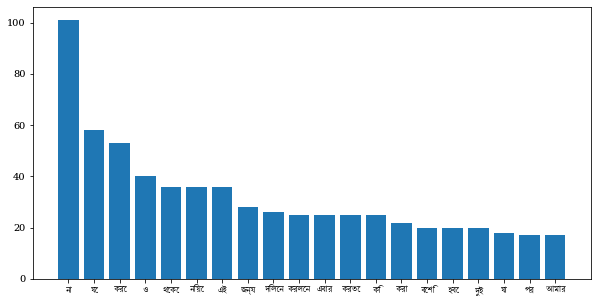

In [78]:
show_stop_words(fake_corpus)

In [79]:
from bnlp.corpus import stopwords, punctuations, digits

def filters(corpus):
  res = []
  for i in corpus:
    if i in stopwords:
      continue

    if i in punctuations + '‘' + '’':
      continue

    if i in digits:
      continue

    res.append(i)

  return res

In [80]:
auth_corpus_filtered = filters(auth_corpus)
fake_corpus_filtered = filters(fake_corpus)

In [81]:
def get_top_words(corpus):
  dic = defaultdict(int)

  for word in corpus:
      dic[word] +=1

  top = sorted(dic.items(), key=lambda x:x[1],reverse=True)
  x,y=zip(*top)
  return x, y

In [82]:
x, y = get_top_words(auth_corpus_filtered)

print("Top 10 words")
print(x[:10])
print(y[:10])

Top 10 words
('১৯', 'সেপ্টেম্বর', '২০১৮', 'প্রধানমন্ত্রী', 'পাকিস্তান', 'লাখ', 'ভারত', 'আটক', 'বাংলাদেশ', 'উদ্ধার')
(56, 52, 51, 45, 33, 25, 23, 21, 20, 20)
Top 10 words
('১৯', 'সেপ্টেম্বর', '২০১৮', 'প্রধানমন্ত্রী', 'পাকিস্তান', 'লাখ', 'ভারত', 'আটক', 'বাংলাদেশ', 'উদ্ধার')
(56, 52, 51, 45, 33, 25, 23, 21, 20, 20)


In [83]:
x, y = get_top_words(fake_corpus_filtered)

print("Top 10 words")
print(x[:10])
print(y[:10])

Top 10 words
('দৈনিক', 'মতিকণ্ঠ', 'Bengal', 'Beats', 'এক', 'হয়ে', 'সাথে', 'দিয়ে', 'কারণে', 'শেখ')
(151, 151, 139, 139, 41, 29, 24, 21, 20, 19)
Top 10 words
('দৈনিক', 'মতিকণ্ঠ', 'Bengal', 'Beats', 'এক', 'হয়ে', 'সাথে', 'দিয়ে', 'কারণে', 'শেখ')
(151, 151, 139, 139, 41, 29, 24, 21, 20, 19)


# Classify News

In [84]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 77.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 28.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 25.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [85]:
import time

import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.optim import AdamW
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
from tqdm.notebook import tqdm
from transformers import BertModel, BertTokenizer, BertForSequenceClassification

# Prepare Datasets
- Dataset Info: Datasets contain `48678` authentic news and `1299` fake news. For this experiment, instead of all authentic news, only 5 times of fake news was used.
- And only consider the first 100 words (including headline and content)

- On datasets: Both headline and content of news were used. And manually a separator was added also `[SEP]`.

> BERT model is designed in such a way that the sentence has to start with the [CLS] token and end with the [SEP] token.
If we want to make separation of two sentences we can use [SEP] between sentences

### Train and Test split: 
(only 20% data used for testing)
- Total Dataset size: 10392
- Total train size: 8313
- Test train size: 2079

In [86]:
class NewsDatasets(Dataset):
    def __init__(self, data, max_length=100):
        self.data = data
        
        self.config = {
            "max_length": max_length,
            "padding": "max_length",
            "return_tensors": "pt",
            "truncation": True,
            "add_special_tokens": True
        }

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        value = self.data.iloc[idx]
        return value['head']+"[SEP]"+value['con'] , value['label']

In [87]:
auth = pd.read_csv("/content/drive/MyDrive/Authentic-48K.csv")
fake = pd.read_csv("/content/drive/MyDrive/Fake-1K.csv")

df = auth[:fake.shape[0]* 6]
df = df.append(fake)
df = df.sample(frac=1).reset_index(drop=True)
len(df) , len(auth)


(11691, 48678)

(11691, 48678)

In [88]:
df.head()

,articleID,domain,date,category,headline,content,label
0,3380,prothomalo.com,2018-09-20 16:02:04,Entertainment,অপূর্বর ১২-তে ১২ বাঁক,দরজা খুলে স্বাগত জানালেন অপূর্ব। আমাদের অপেক্ষ...,1
1,157,mzamin.com,2018-09-19 17:55:37,National,যেখানে কোটা সংস্কারের মিছিল সেখানেই ছাত্রলীগ,ঢাকা বিশ্ববিদ্যালয় ক্যাম্পাসে পাল্টাপাল্টি মিছ...,1
2,3808,bangla.bdnews24.com,2018-09-20 19:01:55,Finance,শাহ্জালাল ইসলামী ব্যাংকের অডিট কমিটির সভা অনুষ...,সম্প্রতি ব্যাংকের প্রধান কার্যালয়ে ওই সভা হয় ব...,1
3,1862,bd24live.com,2018-09-20 11:51:58,Entertainment,"‘বিগ বস-১২’, সপ্তাহে কত টাকা পাচ্ছেন অভিনেত্রী...",‘বিগ বস-১২’ ভারতীয় টেলিভিশন রিয়ালিটি শো বিগ ...,1
4,4547,dailynayadiganta.com,2018-09-20 23:14:49,Politics,নির্বাচনকালীন সরকারের মন্ত্রীসভায় থাকার আশা এর...,জাতীয় পার্টির চেয়ারম্যান হুসেইন মুহম্মদ এরশাদ ...,1


,articleID,domain,date,category,headline,content,label
0,10890,banglatribune.com,2018-09-23 14:30:10,Education,সিআইইউতে শিক্ষার্থীদের জন্য ‘কর্পোরেট টক’,চট্টগ্রাম ইন্ডিপেন্ডেন্ট ইউনিভার্সিটির মিলনায়ত...,1
1,10882,independent24.com,2018-09-23 17:26:47,National,নড়িয়ায় পদ্মার ভাঙনে স্বাস্থ্য কমপ্লেক্সে ফাটল,শরীয়তপুরের সুরেশ্বর পয়েন্টে পদ্মার পানি প্রবাহ...,1
2,4525,bangla.bdnews24.com,2018-09-20 23:49:23,Finance,সর্বোচ্চ রেমিটেন্স আনার পুরস্কার পেল ইসলামী ব...,২০১৭ সালে প্রবাসীরা এই ব্যাংকের মাধ্যমে সবচেয়ে...,1
3,790,channeldhaka.news,2019-02-10T15:39:24+00:00,Entertainment,মৌসুমী এমপি না হওয়ায় মন খারাপ করে রাতে ভাত খ...,ShareTweetসংরক্ষিত মহিলা আসনে আওয়ামীলীগের মনো...,0
4,12289,banglanews24.com,2018-09-24 15:57:22,National,সিলেটে সীমান্ত জনপদে ঐতিহবাহী নৌকাবাইচ,সিলেট: `চন্দ্র সুর্য বান্দা আছে নায়েরই আগায়/...,1


In [89]:
from bnlp import BasicTokenizer
from bnlp.corpus import stopwords, punctuations, letters, digits
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()


btokenizer = BasicTokenizer()

def clean_text(text):
    tokens = btokenizer.tokenize(text)
    filtered = []
    for i in tokens:
        i= ps.stem(i)
        if i in stopwords:
            continue
    
        if i in punctuations + '‘' + '’':
            continue
    
        filtered.append(i)
    
    return " ".join(filtered)

print("********** Before ***************")
text = df.iloc[1]['content']
print(text)
print("\n********** After ***************")
print(clean_text(text))

********** Before ***************
ঢাকা বিশ্ববিদ্যালয় ক্যাম্পাসে পাল্টাপাল্টি মিছিল করেছে কোটা সংস্কার দাবিতে আন্দোলনকারী ও ছাত্রলীগ। দ্রুত সময়ের মধ্যে কোটা সংস্কারের প্রজ্ঞাপন জারির দাবিতে বাংলাদেশ সাধারণ ছাত্র অধিকার সংরক্ষণ পরিষদ বিক্ষোভ মিছিল করে। অন্যদিকে প্রথম ও দ্বিতীয় শ্রেণির সরকারি চাকরিতে বিদ্যমান কোটা বাতিলের সুপারিশ করে কোটা পর্যালোচনা কমিটির সুপারিশ ও প্রধানমন্ত্রীকে স্বাগত জানিয়ে সাধারণ শিক্ষার্থীদের ব্যানারে আনন্দ মিছিল করে ছাত্রলীগ। গতকাল সকাল সাড়ে ১১টা থেকে উভয় পক্ষের পাল্টাপাল্টি কর্মসূচিতে উত্তপ্ত ছিল ঢাকা বিশ্ববিদ্যালয় ক্যাম্পাস। আতঙ্ক দেখা যায় সাধারণ শিক্ষার্থীদের মাঝে। বিক্ষোভ মিছিল শেষে কোটা আন্দোলনের নেতা নুরুল হক নূর সমাবেশে বলেন, ‘দ্রুত সময়ের মধ্যে প্রজ্ঞাপন না দিলে বাংলার ছাত্রসমাজ ছাত্র সংগঠনগুলোর সঙ্গে মতবিনিময় করে দুর্বার আন্দোলন গড়ে তুলবে। এসময় সোনালী ব্যাংকের নিয়োগ বিজ্ঞপ্তি ও ৪০তম বিসিএসের বিজ্ঞপ্তিকে ছাত্র সমাজের সঙ্গে প্রহসন হিসেবে চিহ্নিত করে অবিলম্বে তা বাতিলের দাবি করেন। পূর্ব ঘোষণা অনুযায়ী সকাল ১১টায় কোটা আন্দোলনকারীরা ঢাকা বিশ্ববিদ্যালয়ের বিজ্ঞান 

In [90]:
df['head'] = df.headline.apply(clean_text)
df['con'] = df.content.apply(clean_text)

In [91]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2, random_state=121, stratify=df['label'])

In [92]:
len(train_df), len(test_df)

(9352, 2339)

(9352, 2339)

In [93]:
training_data = NewsDatasets(train_df)
train_dataloader = DataLoader(training_data, batch_size=16, shuffle=True)

In [94]:
test_data = NewsDatasets(test_df)
test_dataloader = DataLoader(test_data, batch_size=16, shuffle=True)

# Define Model
 `Bert` stands for Bidirectional Encoder Representations from Transformers used in this experiment with two additional `Fully Connected` Layers. 
 
 For this experiment, [Bangla Bert](https://huggingface.co/sagorsarker/bangla-bert-base) pretrained model was used.

#### FC layers
- First Linear Layer: IO(768 -> 128)
- Second Linear Layer: IO(128 -> 2)

#### Additionals
- Activation Fuction: Relu
- Dropout: 20%
- Optimizer: AdamW
- Loss: CrossEntropyLoss
- Scheduler: StepLR

In [95]:
class NewsBert(nn.Module):

    def __init__(self, bert):
        super(NewsBert, self).__init__()

        self.bert = bert

        # dropout layer
        self.dropout = nn.Dropout(0.2)

        # relu activation function
        self.relu = nn.ReLU()

        # dense layer 1
        self.fc1 = nn.Linear(768, 256)
        # self.relu = nn.ReLU()
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 256)
        self.fc4 = nn.Linear(256, 128)

        # dense layer 2 (Output layer)
        self.fc5 = nn.Linear(128, 2)  

    # define the forward pass
    def forward(self, input_ids, token_type_ids, attention_mask):
        # pass the inputs to the model
        out = self.bert(input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids)

        x = self.fc1(out[1])
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(self.dropout(x))
        x = self.relu(x)
        x = self.fc4(self.dropout(x))
        x = self.relu(x)

        # output layer
        x = self.fc5(self.dropout(x))
        
        return x

In [96]:
bert_model_name = "sagorsarker/bangla-bert-base"
bert = BertModel.from_pretrained(bert_model_name)
tokenizer = BertTokenizer.from_pretrained(bert_model_name)

Downloading:   0%|          | 0.00/491 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/660M [00:00<?, ?B/s]

Some weights of the model checkpoint at sagorsarker/bangla-bert-base were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Downloading:   0%|          | 0.00/2.24M [00:00<?, ?B/s]

Some weights of the model checkpoint at sagorsarker/bangla-bert-base were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [97]:
# for param in bert.parameters():
#     param.requires_grad = False

In [98]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = NewsBert(bert)
model.to(device);

In [99]:
s = "আমি বাংলায় গান গাই। [SEP]"
t = tokenizer.encode_plus(s, return_tensors="pt").to(device)
print(t)
out = model(**t)
print(out)

{'input_ids': tensor([[  101,  2169,  2492,  9294,  2552, 13985,  1014,   102,   102]],
       device='cuda:0'), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0]], device='cuda:0'), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1]], device='cuda:0')}
tensor([[0.0445, 0.0313]], device='cuda:0', grad_fn=<AddmmBackward0>)
{'input_ids': tensor([[  101,  2169,  2492,  9294,  2552, 13985,  1014,   102,   102]],
       device='cuda:0'), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0]], device='cuda:0'), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1]], device='cuda:0')}
tensor([[ 0.0556, -0.0741]], device='cuda:0', grad_fn=<AddmmBackward0>)


In [100]:
from torch.optim.lr_scheduler import StepLR

optimizer = AdamW(model.parameters(), lr=1e-5)
criterion = nn.CrossEntropyLoss()
scheduler = StepLR(optimizer, step_size=2, gamma=0.1)

# Lets Train

In [101]:
def train(model, dataloader, optimizer, criterion, config):
    model.train()  # prep model for training
    train_loss = 0
    for batch in tqdm(dataloader):
        text, labels = batch

        model.zero_grad()

        inputs = tokenizer.batch_encode_plus(
            text, **config
        )
        input_ids = inputs['input_ids'].to(device)
        token_type_ids = inputs['token_type_ids'].to(device)
        attention_mask = inputs['attention_mask'].to(device)
        labels = labels.to(device)

        # move things to model
        logs = model(token_type_ids=token_type_ids, input_ids=input_ids, attention_mask=attention_mask)

        loss = criterion(logs, labels)
        train_loss += loss.item() * input_ids.size(0)
        loss.backward()

        # clip the the gradients to 1.0. It helps in preventing the exploding gradient problem
        nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()

    return train_loss

In [102]:
def evaluate(model, dataloader, criterion, config):
    total = 0
    correct = 0
    valid_loss = 0.0

    model.eval()  # prep model for evaluation
    for batch in dataloader:
        text, labels = batch
        inputs = tokenizer.batch_encode_plus(
            text, **config
        )
        input_ids = inputs['input_ids'].to(device)
        token_type_ids = inputs['token_type_ids'].to(device)
        attention_mask = inputs['attention_mask'].to(device)
        labels = labels.to(device)

        # move things to model
        output = model(token_type_ids=token_type_ids, input_ids=input_ids, attention_mask=attention_mask)

        loss_p = criterion(output, labels)
        # update running validation loss
        valid_loss += loss_p.item() * input_ids.size(0)
        # calculate accuracy
        proba = torch.exp(output)
        top_p, top_class = proba.topk(1, dim=1)
        equals = top_class == labels.view(*top_class.shape)
        # accuracy += torch.mean(equals.type(torch.FloatTensor)).item()

        _, predicted = torch.max(output.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    return total, correct, valid_loss

In [103]:
epochs = 10
tokenizer_config = {
    "max_length": 100,
    "padding": "max_length",
    "return_tensors": "pt",
    "truncation": True,
    "add_special_tokens": True
}

In [104]:
train_loss_data, valid_loss_data = [], []
valid_loss_min = np.Inf
since = time.time()
best_loss = np.inf

for epoch in range(epochs):
    print("Epoch: {}/{}".format(epoch + 1, epochs))
    # monitor training loss
    train_loss = 0.0
    valid_loss = 0.0
    total = 0
    correct = 0
    e_since = time.time()

    # Train Model
    train_loss += train(model, train_dataloader, optimizer, criterion, tokenizer_config)
    # Now Evaluate
    out = evaluate(model, test_dataloader, criterion, tokenizer_config)
    total += out[0]
    correct += out[1]
    valid_loss += out[2]
    
    scheduler.step()

    # print training/validation statistics
    # calculate average loss over an epoch
    train_loss = train_loss / len(train_dataloader.dataset)
    valid_loss = valid_loss / len(test_dataloader.dataset)

    # calculate train loss and running loss
    train_loss_data.append(train_loss * 100)
    valid_loss_data.append(valid_loss * 100)
    
    if valid_loss < best_loss:
        best_loss = valid_loss
        torch.save(model.state_dict(), "news_model1.pth")

    print("\tTrain loss:{:.6f}..".format(train_loss),
          "\tValid Loss:{:.6f}..".format(valid_loss),
          "\tAccuracy: {:.4f}".format(correct / total * 100))

time_elapsed = time.time() - since
print('Training completed in {:.0f}m {:.0f}s'.format(
    time_elapsed // 60, time_elapsed % 60))

Epoch: 1/10


  0%|          | 0/585 [00:00<?, ?it/s]

	Train loss:0.377790.. 	Valid Loss:0.252477.. 	Accuracy: 92.7319
Epoch: 2/10


  0%|          | 0/585 [00:00<?, ?it/s]

	Train loss:0.184521.. 	Valid Loss:0.161300.. 	Accuracy: 94.9551
Epoch: 3/10


  0%|          | 0/585 [00:00<?, ?it/s]

	Train loss:0.104563.. 	Valid Loss:0.178103.. 	Accuracy: 95.6819
Epoch: 4/10


  0%|          | 0/585 [00:00<?, ?it/s]

	Train loss:0.097088.. 	Valid Loss:0.173464.. 	Accuracy: 95.7674
Epoch: 5/10


  0%|          | 0/585 [00:00<?, ?it/s]

	Train loss:0.086055.. 	Valid Loss:0.176444.. 	Accuracy: 95.8529
Epoch: 6/10


  0%|          | 0/585 [00:00<?, ?it/s]

	Train loss:0.087737.. 	Valid Loss:0.177980.. 	Accuracy: 96.0239
Epoch: 7/10


  0%|          | 0/585 [00:00<?, ?it/s]

	Train loss:0.082802.. 	Valid Loss:0.177766.. 	Accuracy: 95.9384
Epoch: 8/10


  0%|          | 0/585 [00:00<?, ?it/s]

	Train loss:0.086412.. 	Valid Loss:0.177904.. 	Accuracy: 95.9384
Epoch: 9/10


  0%|          | 0/585 [00:00<?, ?it/s]

	Train loss:0.084367.. 	Valid Loss:0.177903.. 	Accuracy: 95.9384
Epoch: 10/10


  0%|          | 0/585 [00:00<?, ?it/s]

	Train loss:0.084478.. 	Valid Loss:0.177896.. 	Accuracy: 95.9384
Training completed in 43m 54s
Epoch: 1/10


  0%|          | 0/585 [00:00<?, ?it/s]

	Train loss:0.362967.. 	Valid Loss:0.235039.. 	Accuracy: 93.9718
Epoch: 2/10


  0%|          | 0/585 [00:00<?, ?it/s]

	Train loss:0.181738.. 	Valid Loss:0.192921.. 	Accuracy: 94.8696
Epoch: 3/10


  0%|          | 0/585 [00:00<?, ?it/s]

	Train loss:0.116440.. 	Valid Loss:0.188978.. 	Accuracy: 95.1689
Epoch: 4/10


  0%|          | 0/585 [00:00<?, ?it/s]

	Train loss:0.101159.. 	Valid Loss:0.201843.. 	Accuracy: 95.2116
Epoch: 5/10


  0%|          | 0/585 [00:00<?, ?it/s]

	Train loss:0.093148.. 	Valid Loss:0.190530.. 	Accuracy: 95.3826
Epoch: 6/10


  0%|          | 0/585 [00:00<?, ?it/s]

	Train loss:0.091348.. 	Valid Loss:0.190535.. 	Accuracy: 95.4254
Epoch: 7/10


  0%|          | 0/585 [00:00<?, ?it/s]

	Train loss:0.091091.. 	Valid Loss:0.190561.. 	Accuracy: 95.3826
Epoch: 8/10


  0%|          | 0/585 [00:00<?, ?it/s]

	Train loss:0.086486.. 	Valid Loss:0.190658.. 	Accuracy: 95.3826
Epoch: 9/10


  0%|          | 0/585 [00:00<?, ?it/s]

	Train loss:0.089741.. 	Valid Loss:0.190653.. 	Accuracy: 95.3826
Epoch: 10/10


  0%|          | 0/585 [00:00<?, ?it/s]

	Train loss:0.089044.. 	Valid Loss:0.190653.. 	Accuracy: 95.3826
Training completed in 44m 5s


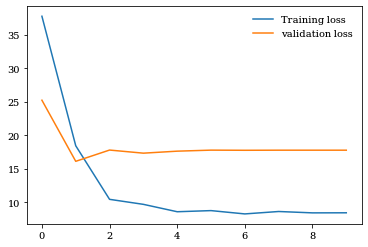

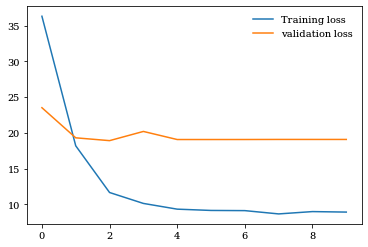

In [105]:
from matplotlib import pyplot as plt

plt.plot(train_loss_data, label="Training loss")
plt.plot(valid_loss_data, label="validation loss")
plt.legend(frameon=False)

# Testing
To test this model, the left 15% data was used.

In [106]:
model.load_state_dict(torch.load("./news_model1.pth", map_location = device))

<All keys matched successfully>

<All keys matched successfully>

In [107]:
all_preds = []
all_labels = []

for batch in test_dataloader:
    text, labels = batch
    inputs = tokenizer.batch_encode_plus(
        text, **tokenizer_config
    )
    input_ids = inputs['input_ids'].to(device)
    token_type_ids = inputs['token_type_ids'].to(device)
    attention_mask = inputs['attention_mask'].to(device)
    labels = labels.to(device)

    # move things to model
    output = model(token_type_ids=token_type_ids, input_ids=input_ids, attention_mask=attention_mask)
    preds = output.detach().cpu().numpy()
    preds = np.argmax(preds, axis = 1)
    all_preds.extend(preds)
    all_labels.extend(labels.cpu().numpy())

In [108]:
from sklearn.metrics import classification_report

# preds = np.argmax(preds, axis = 1)
print(classification_report(all_labels, all_preds))

              precision    recall  f1-score   support

           0       0.78      0.76      0.77       260
           1       0.97      0.97      0.97      2079

    accuracy                           0.95      2339
   macro avg       0.88      0.87      0.87      2339
weighted avg       0.95      0.95      0.95      2339

              precision    recall  f1-score   support

           0       0.83      0.72      0.77       260
           1       0.96      0.98      0.97      2079

    accuracy                           0.95      2339
   macro avg       0.90      0.85      0.87      2339
weighted avg       0.95      0.95      0.95      2339



#### Thank you very much for reading.
### পড়ার জন্য আপনাকে অনেক ধন্যবাদ।